# Comparison between energy consumption from different stress tests from stress-ng

The command run was: `stress-ng -cpu 8 --cpu-method [method_name]` <br>
Where method_name is one of: `ackermann, ln2, callfunc`

The smartphone used was an Samsung Galaxy A8 (SM-A530F). 
The experiment was run under the following conditions:
- The stress tests were made with the phone in idle mode, meaning it's screen was turned on, but no applications were running (besides the stress test).
- The battery was fully charged (100%)
- Wi-Fi and GSM network were turned off
- The sampling rate was 2 Hz (1 sample every 0.5 seconds) but the kernel only updates the battery state every 10 seconds

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from codes.clean import clean_energy_data

In [2]:
dirty_ackermann = pd.read_csv('csvfiles/stress/stress-ackermann.csv')
dirty_ln2 = pd.read_csv('csvfiles/stress/stress-ln2.csv')
dirty_callfunc = pd.read_csv('csvfiles/stress/stress-callfunc.csv')

The following information is avaibable on each csv file:

---

<dl>
<dt><b>timestamp</b></dt>
    <dd>Milliseconds since the UNIX Epoch 1970-01-01 00:00:00 UTC.</dd>
<dt><b>thermalzone_temp</b></dt>
    <dd>Temperature from CPU thermal zones, measured in tenths of centigrate</dd>
<dt><b>current_now</b></dt>
    <dd>The battery current at the moment of the log, measured in microamperes. It is positive value if the phone is charging and negative otherwise. </dd>
<dt><b>current_avg</b></dt>
    <dd>An average of the current discharge calculated by an specific on chip device sensor. This value is not available on some devices.
    It's also measured in microamperes. </dd>
<dt><b>voltage_now</b></dt>
    <dd>The battery current at the moment of the log, measured in microvolts. </dd>
<dt><b>voltage_avg</b></dt>
    <dd>The same as current_avg, but for battery voltage instead. It's also measured in microvolts. </dd> 
<dt><b>batt_temp</b></dt>
    <dd>The battery's temperature. Measured in tenths of centigrate. ($\frac{1}{10}$ °C) </dd>
<dt><b>health</b></dt>
    <dd>Represents the health of the battery. It can be one of the following values: [Cold, Dead, Good, Overheat, Over Voltage, Unknown] </dd>
<dt><b>status</b></dt>
    <dd>The battery current operating status. It can be one of the following values: [Full, Charging, Discharging, Not charging, Unknown] </dd>
</dl>

---

Note that the timestamp are measured in milliseconds now. Which is different from the older analysis because the reading script was translated from a shell script to Java (which is using [currentTimeMillis](https://docs.oracle.com/javase/7/docs/api/java/lang/System.html#currentTimeMillis()) to get the timestamps).

More information on this data is available on the [Android source files documentation](https://android.googlesource.com/kernel/common/+/android-4.4/Documentation/power/power_supply_class.txt)

The tests from stress-ng were run for 10 minutes, using two big cores running on maximum frequency (2148 MHz)

In [3]:
dirty_ackermann.head()

timestamp  iteration   little      big  thermalzone_temp0  \
0  1574098193420          0  1568000  2148000                350   
1  1574098193969          0  1568000  2148000                520   
2  1574098194556          0  1568000  2148000                560   
3  1574098195117          0  1568000  2148000                590   
4  1574098195721          0  1568000  2148000                610   

   thermalzone_temp1  thermalzone_temp2  thermalzone_temp3  thermalzone_temp4  \
0                350                320                294                270   
1                520                350                294                270   
2                570                390                294                272   
3                590                410                294                272   
4                610                420                294                272   

   current_now  current_avg  voltage_now  voltage_avg  batt_temp  capacity  \
0           -8           -3      4313000      4312000        272       100   
1           -8           -3      4313000      4312000        272       100   
2         -495          -64      4314000      4314000        272       100   
3         -495          -64      4314000      4314000        272       100   
4         -495          -64      4314000      4314000        272       100   

  health status  
0   GOOD   FULL  
1   GOOD   FULL  
2   GOOD   FULL  
3   GOOD   FULL  
4   GOOD   FULL

The function clean_energy_data is defined in the file [clean.py](./codes/clean.py) and transforms the raw values from the csv files into more readable units.

In [4]:
ackermann = clean_energy_data(dirty_ackermann)
ln2 = clean_energy_data(dirty_ln2)
callfunc = clean_energy_data(dirty_callfunc)

In [5]:
ackermann.head()

timestamp  iteration   little      big  \
datetime                                                              
2019-11-18 17:29:53.420  1574098193420          0  1568000  2148000   
2019-11-18 17:29:53.969  1574098193969          0  1568000  2148000   
2019-11-18 17:29:54.556  1574098194556          0  1568000  2148000   
2019-11-18 17:29:55.117  1574098195117          0  1568000  2148000   
2019-11-18 17:29:55.721  1574098195721          0  1568000  2148000   

                         thermalzone_temp0  thermalzone_temp1  \
datetime                                                        
2019-11-18 17:29:53.420                350                350   
2019-11-18 17:29:53.969                520                520   
2019-11-18 17:29:54.556                560                570   
2019-11-18 17:29:55.117                590                590   
2019-11-18 17:29:55.721                610                610   

                         thermalzone_temp2  thermalzone_temp3  \
datetime                                                        
2019-11-18 17:29:53.420                320                294   
2019-11-18 17:29:53.969                350                294   
2019-11-18 17:29:54.556                390                294   
2019-11-18 17:29:55.117                410                294   
2019-11-18 17:29:55.721                420                294   

                         thermalzone_temp4  current_now  current_avg  \
datetime                                                               
2019-11-18 17:29:53.420                270       -0.008       -0.003   
2019-11-18 17:29:53.969                270       -0.008       -0.003   
2019-11-18 17:29:54.556                272       -0.495       -0.064   
2019-11-18 17:29:55.117                272       -0.495       -0.064   
2019-11-18 17:29:55.721                272       -0.495       -0.064   

                         voltage_now  voltage_avg  batt_temp  capacity health  \
datetime                                                                        
2019-11-18 17:29:53.420        4.313        4.312       27.2       100   GOOD   
2019-11-18 17:29:53.969        4.313        4.312       27.2       100   GOOD   
2019-11-18 17:29:54.556        4.314        4.314       27.2       100   GOOD   
2019-11-18 17:29:55.117        4.314        4.314       27.2       100   GOOD   
2019-11-18 17:29:55.721        4.314        4.314       27.2       100   GOOD   

                        status     power  
datetime                                  
2019-11-18 17:29:53.420   FULL  0.000035  
2019-11-18 17:29:53.969   FULL  0.000035  
2019-11-18 17:29:54.556   FULL  0.002135  
2019-11-18 17:29:55.117   FULL  0.002135  
2019-11-18 17:29:55.721   FULL  0.002135

### Visualization of ackermann stress test

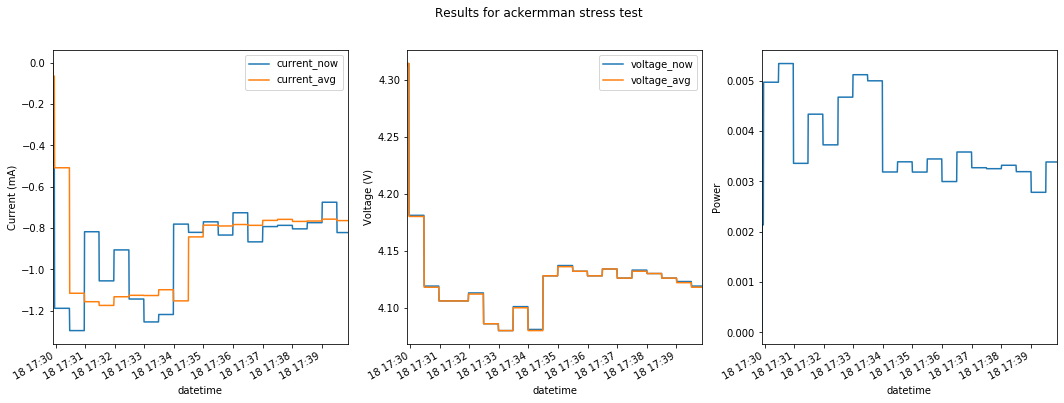

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))

fig.suptitle('Results for ackermman stress test')

ax1.set_ylabel('Current (mA)')
ax1.set_xlabel('Duration')
ackermann[['current_now', 'current_avg']].plot(ax=ax1)

ax2.set_ylabel('Voltage (V)')
ackermann[['voltage_now', 'voltage_avg']].plot(ax=ax2)

ax3.set_ylabel('Power')
_ = ackermann['power'].plot(ax=ax3)

### Visualization of the ln2 stress-test

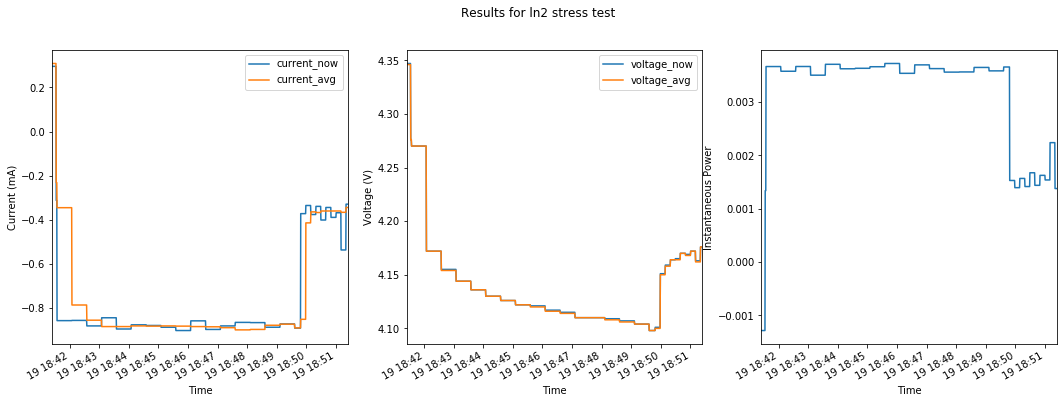

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))

fig.suptitle('Results for ln2 stress test')

ln2[['current_now', 'current_avg']].plot(ax=ax1)
ax1.set_ylabel('Current (mA)')
ax1.set_xlabel('Time')

ln2[['voltage_now', 'voltage_avg']].plot(ax=ax2)
ax2.set_ylabel('Voltage (V)')
ax2.set_xlabel('Time')

ln2['power'].plot(ax=ax3)
ax3.set_ylabel('Instantaneous Power')
_ = ax3.set_xlabel('Time')

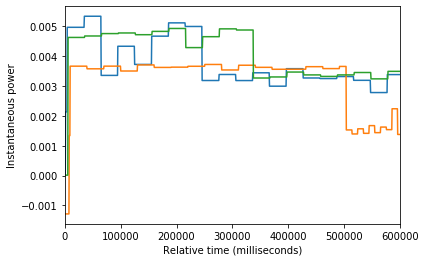

In [8]:
# Avoid changing the original dataframe
cp_ackermann = ackermann.copy()
cp_ln2 = ln2.copy()
cp_callfunc = callfunc.copy()

# Removes the starting time from the timestamp so that they become normalized, allowing for comparison
# The timestamps are UNIX epoch times measured in milliseconds
cp_ackermann['timestamp'] = ackermann['timestamp'].apply(lambda x: x - ackermann.iloc[0]['timestamp'])
cp_ln2['timestamp'] = ln2['timestamp'].apply(lambda x: x - ln2.iloc[0]['timestamp'])
cp_callfunc['timestamp'] = callfunc['timestamp'].apply(lambda x: x - callfunc.iloc[0]['timestamp'])

norm_ackermann = cp_ackermann.set_index('timestamp')
norm_ln2 = cp_ln2.set_index('timestamp')
norm_callfunc = cp_callfunc.set_index('timestamp')

norm_ackermann['power'].plot()
norm_ln2['power'].plot()
norm_callfunc['power'].plot()
plt.ylabel('Instantaneous power')
_ = plt.xlabel('Relative time (milliseconds)')

### Energy estimation

The energy estimation is calculate with the using the following equations:

$$P(t) = V(t) \cdot I(t) $$

$$Energy = \int_{0}^{T}P(t)dt$$

Where the instantaneous power is in the power columns from the dataframes and the integration is done using [numpy.trapz](https://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html)

In [11]:
powers = pd.concat([norm_ackermann['power'], norm_ln2['power'], norm_callfunc['power']], axis=1, keys=['ackermann', 'ln2', 'callfunc'])

# Uses ffill to remove NaN that are caused due to timestamps not being spread exactly half a second apart
powersf = powers.ffill()

# Transforms timestamps from milliseconds to seconds
powersf.index = powersf.index.map(lambda milli: milli / 1000)

# Integrate instantaneous power (values) over time (index)
energy = powersf.apply(lambda x: np.trapz(x.values, x.index))

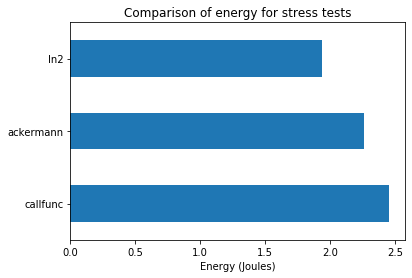

In [27]:
energy.sort_values(ascending=False).plot(kind='barh')
plt.title('Comparison of energy for stress tests')
_ = plt.xlabel('Energy (Joules)')

plt.savefig('images/comparison.png')